In [1]:
import requests
from pymongo import MongoClient
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

In [6]:
#set up Mongo to store data 
client = MongoClient('localhost', 27017)

db = client['cap1_db']
col1 = db['col1']
col_people = db['col_people']


In [3]:
list_all_people = []
for doc in col_people.find():
    page = doc['page']
    list_all_people.append(page)

len(list_all_people)

18212

In [4]:
category_url = ['Data_scientists', 
                '20th-century_economists',
                '21st-century_economists', 
                '21st-century_chemists', 
                '20th-century_chemists',
                '21st-century_physicists',
                '20th-century_physicists',
                '21st-century_biologists',
                '20th-century_biologists',
                'Microbiologists',
                '21st-century_physicians',
                '20th-century_physicians']


In [7]:
subcat_dict = dict()
for i in category_url:
    doc = col1.find_one({'page': i })
    subcat_dict[i] = doc['subcat_link']
subcat_dict2 = dict()
subcategory_category_url = []
for i in category_url: 
    doc = col1.find_one({'page': i})
    subcat_list = doc['subcat_link']
    for subcat in subcat_list:
        subcat = subcat.replace('/wiki/Category:', '')
        subcategory_category_url.append(subcat)
        subdoc = col1.find_one({'page': subcat })
        try:
            subcat_dict2[subcat] = subdoc['subcat_link']
        except:
            subcat_dict2[subcat] = None

In [8]:
full_subcat_dict = {}
for k, v in subcat_dict.items():
    for cat in v:
        cat = cat.replace('/wiki/Category:', '')
        for k2, v2 in subcat_dict2.items():
            if cat == k2:
                sub_dict = {k2:v2}
                if k not in full_subcat_dict:
                    full_subcat_dict[k] = sub_dict
                elif k in full_subcat_dict:
                    full_subcat_dict[k].update(sub_dict)

for k, v in full_subcat_dict.items():
    for k2, v2, in full_subcat_dict[k].items():
        fix_list = []
        try:
            for cat in v2:
                cat = cat.replace('/wiki/Category:', '')
                fix_list.append(cat)
        except:
            continue
        full_subcat_dict[k][k2] = fix_list

flat_dict = {}
for k, v in full_subcat_dict.items():
    flatten = []
    for k2, v2 in v.items():
        flatten.append(k2)
        try:
            for i in v2:
                flatten.append(i)
        except:
            continue
    flat_dict[k] = flatten


In [9]:
cat_origin_dict = {'Data Science': ['Data_scientists'] , 
            'Economics': ['20th-century_economists',
                '21st-century_economists'],
           'Chemistry': ['21st-century_chemists', 
                '20th-century_chemists'] ,
           'Physics' : ['21st-century_physicists',
                '20th-century_physicists'] ,
           'Physiology or Medicine' : ['21st-century_biologists',
                '20th-century_biologists',
                'Microbiologists',
                '21st-century_physicians',
                '20th-century_physicians']}

In [153]:
df = pd.DataFrame(col_people.find())


In [10]:
dfcsv = pd.read_csv('data/wiki_profile.csv')

In [11]:
dfcsv


,Unnamed: 0,page,field,count_female_words,count_male_words,count_nonbinary_words,doctorate,len_page
0,0,Amalia Fleming,20th-century_Greek_physicians,44,5,0,0,2010
1,1,Marietta Giannakou,20th-century_Greek_physicians,19,0,0,0,732
2,2,George Higoumenakis,20th-century_Greek_physicians,0,11,0,0,391
3,3,Dionysios Ikkos,20th-century_Greek_physicians,1,5,0,0,749
4,4,John Ioannidis,20th-century_Greek_physicians,0,22,0,0,3471
...,...,...,...,...,...,...,...,...
18207,18207,Fritz Plato,20th-century_German_chemists,0,1,0,0,115
18208,18208,Friedrich Raschig,20th-century_German_chemists,0,9,0,0,724
18209,18209,Franz von Soxhlet,20th-century_German_chemists,0,6,0,0,773
18210,18210,Andreas von Antropoff,20th-century_German_chemists,0,23,0,0,1779


In [12]:
dfcsv = dfcsv.drop('Unnamed: 0',1)
dfcsv.reset_index()

,index,page,field,count_female_words,count_male_words,count_nonbinary_words,doctorate,len_page
0,0,Amalia Fleming,20th-century_Greek_physicians,44,5,0,0,2010
1,1,Marietta Giannakou,20th-century_Greek_physicians,19,0,0,0,732
2,2,George Higoumenakis,20th-century_Greek_physicians,0,11,0,0,391
3,3,Dionysios Ikkos,20th-century_Greek_physicians,1,5,0,0,749
4,4,John Ioannidis,20th-century_Greek_physicians,0,22,0,0,3471
...,...,...,...,...,...,...,...,...
18207,18207,Fritz Plato,20th-century_German_chemists,0,1,0,0,115
18208,18208,Friedrich Raschig,20th-century_German_chemists,0,9,0,0,724
18209,18209,Franz von Soxhlet,20th-century_German_chemists,0,6,0,0,773
18210,18210,Andreas von Antropoff,20th-century_German_chemists,0,23,0,0,1779


In [13]:
dfcsv


,page,field,count_female_words,count_male_words,count_nonbinary_words,doctorate,len_page
0,Amalia Fleming,20th-century_Greek_physicians,44,5,0,0,2010
1,Marietta Giannakou,20th-century_Greek_physicians,19,0,0,0,732
2,George Higoumenakis,20th-century_Greek_physicians,0,11,0,0,391
3,Dionysios Ikkos,20th-century_Greek_physicians,1,5,0,0,749
4,John Ioannidis,20th-century_Greek_physicians,0,22,0,0,3471
...,...,...,...,...,...,...,...
18207,Fritz Plato,20th-century_German_chemists,0,1,0,0,115
18208,Friedrich Raschig,20th-century_German_chemists,0,9,0,0,724
18209,Franz von Soxhlet,20th-century_German_chemists,0,6,0,0,773
18210,Andreas von Antropoff,20th-century_German_chemists,0,23,0,0,1779


In [14]:
dfcsv[['count_female_words', 'count_male_words', 'count_nonbinary_words', 'len_page']].astype(int)
dfcsv['doctorate'].astype(bool)

0        False
1        False
2        False
3        False
4        False
         ...  
18207    False
18208    False
18209    False
18210    False
18211     True
Name: doctorate, Length: 18212, dtype: bool

In [15]:
dfcsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18212 entries, 0 to 18211
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   page                   18212 non-null  object
 1   field                  18212 non-null  object
 2   count_female_words     18212 non-null  int64 
 3   count_male_words       18212 non-null  int64 
 4   count_nonbinary_words  18212 non-null  int64 
 5   doctorate              18212 non-null  int64 
 6   len_page               18212 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 996.1+ KB


In [16]:
dfcsv['female'] = [True if (x > y) and (x > z)                   
                   else False 
                   for x, y, z in zip(dfcsv['count_female_words'], dfcsv['count_male_words'], dfcsv['count_nonbinary_words'])]

dfcsv['male'] = [True if (y > x) and (y > z)                   
                   else False 
                   for x, y, z in zip(dfcsv['count_female_words'], dfcsv['count_male_words'], dfcsv['count_nonbinary_words'])]

dfcsv['nonbinary'] = [True if (z > x) and (z > y)                   
                   else False 
                   for x, y, z in zip(dfcsv['count_female_words'], dfcsv['count_male_words'], dfcsv['count_nonbinary_words'])]



In [17]:
#examine nonbinary pages
non_binary = dfcsv[dfcsv['nonbinary']==True]

In [18]:
dfcsv[['female', 'male', 'nonbinary']].sum()

female        3703
male         14013
nonbinary       59
dtype: int64

In [457]:
# it would appear that people categorized as nonbinary had more nonbinary words 'they, them' than male or female indicator words by chance
# will be recategorized

In [19]:
dfcsv['female'] = [True if x > y              
                   else False 
                   for x, y in zip(dfcsv['count_female_words'], dfcsv['count_male_words'])]

dfcsv['male'] = [True if y > x                   
                   else False 
                   for x, y in zip(dfcsv['count_female_words'], dfcsv['count_male_words'])]
dfcsv['gender_unclear'] = [True if y == x                   
                   else False 
                   for x, y in zip(dfcsv['count_female_words'], dfcsv['count_male_words'])]


In [21]:
dfcsv[['female', 'male', 'gender_unclear']].sum()

female             3708
male              14074
gender_unclear      430
dtype: int64

In [22]:
non_binary = dfcsv[dfcsv['gender_unclear']==True]
#where gender is unclear, it appears that these profiles tend to be in another language or are too short
#for example: https://en.wikipedia.org/wiki/Ren%C3%A9_Courtin
#https://en.wikipedia.org/wiki/Auguste_Det%C5%93uf
# https://en.wikipedia.org/wiki/Jules_L%C3%A9on_Austaut

In [23]:
non_binary

,page,field,count_female_words,count_male_words,count_nonbinary_words,doctorate,len_page,female,male,nonbinary,gender_unclear
244,René Courtin,20th-century_economists,0,0,0,0,279,False,False,False,True
260,Auguste Detœuf,20th-century_economists,0,0,0,0,283,False,False,False,True
471,Kurt Langendorf,20th-century_economists,0,0,0,0,52,False,False,False,True
472,Rafael Menjívar Larín,20th-century_economists,0,0,0,0,288,False,False,False,True
519,Étienne Mantoux,20th-century_economists,0,0,0,0,911,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
18116,S. T. Satyamurthi,20th-century_Indian_zoologists,0,0,0,0,493,False,False,False,True
18139,Jules Léon Austaut,20th-century_French_zoologists,0,0,0,0,1005,False,False,False,True
18159,Yseult Le Danois,20th-century_French_zoologists,0,0,0,0,716,False,False,False,True
18162,Joseph Pierre Rondou,20th-century_French_zoologists,0,0,0,0,195,False,False,False,True


In [28]:
def invert_dictionary(d):
    d_out = dict()
    for k, v in d.items():
        for val in v:
            if val not in d_out:
                d_out[val] = set()
                d_out[val]= k
    return d_out

field_dct = invert_dictionary(flat_dict)

def merge_dictionaries(d1, d2):

    d = d1.copy()
    for key, value in d2.items():
        if key in d:
            continnue
        else:
            d[key] = key
    return d

d_original = {}
d_original = d_original.fromkeys(category_url)

field_dct = merge_dictionaries(field_dct, d_original)

In [29]:
big_cat = {'Data Science': ['Data_scientists'] , 
            'Economics': ['20th-century_economists',
                '21st-century_economists'],
           'Chemistry': ['21st-century_chemists', 
                '20th-century_chemists'] ,
           'Physics' : ['21st-century_physicists',
                '20th-century_physicists'] ,
           'Physiology or Medicine' : ['21st-century_biologists',
                '20th-century_biologists',
                'Microbiologists',
                '21st-century_physicians',
                '20th-century_physicians']}
big_cat = invert_dictionary(big_cat)

In [30]:
category = []
here = []
for field in dfcsv['field']:
    if field in field_dct:
        category.append(field_dct[field])
        here.append(True)
    else:
        category.append(field)
        here.append(False)
    

In [31]:
dfcsv['category'] = category
dfcsv['here'] = here


In [32]:
dfcsv = dfcsv[dfcsv['here']==True]

In [33]:
df_group_cat = dfcsv.groupby('category').sum()



In [34]:
df_group_cat

,count_female_words,count_male_words,count_nonbinary_words,doctorate,len_page,female,male,nonbinary,gender_unclear,here
category,,,,,,,,,,
20th-century_biologists,15666,55253,2999,631,6046921,702,3040,5,0,3742
20th-century_chemists,5230,16441,1173,335,1963960,185,771,4,0,956
20th-century_economists,4239,32956,1934,515,3842056,196,1483,1,0,1679
20th-century_physicians,21084,73764,4194,152,7818675,833,3527,4,0,4360
20th-century_physicists,5290,29521,1825,485,3314660,200,1243,0,0,1443
21st-century_biologists,5900,8705,818,459,1929295,403,668,1,0,1071
21st-century_chemists,3391,6561,373,377,1289566,203,500,0,0,703
21st-century_economists,2651,10552,851,503,1778140,178,719,1,0,897
21st-century_physicians,4684,7378,695,22,1208984,239,410,1,0,649


In [35]:
df_group_cat['perc_fem'] = df_group_cat['female']/df_group_cat['here']

In [36]:
df_group_cat = df_group_cat.reset_index()

In [37]:
df_group_cat = df_group_cat.sort_values('perc_fem')

In [38]:
x = df_group_cat['category']
y = df_group_cat['perc_fem']

<BarContainer object of 12 artists>

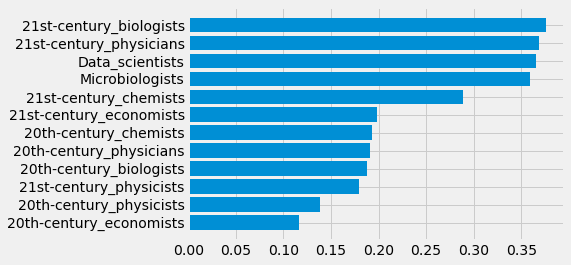

In [39]:
fig, ax = plt.subplots()
#could calculate variance and add error bars

ax.barh(x, y)


In [40]:
df_group_gender_cat = dfcsv.groupby(['category', 'female']).sum()

In [41]:
df_group_gender_cat['prop_phd'] = df_group_gender_cat['doctorate'] / df_group_gender_cat['here']

In [42]:
df_group_gender_cat = df_group_gender_cat.reset_index()

In [43]:

women_phd = df_group_gender_cat['prop_phd'][df_group_gender_cat['female'] == True]
men_phd = df_group_gender_cat['prop_phd'][df_group_gender_cat['female'] == False]

In [44]:
y_women  = women_phd
y_men = men_phd
x = df_group_cat['category']

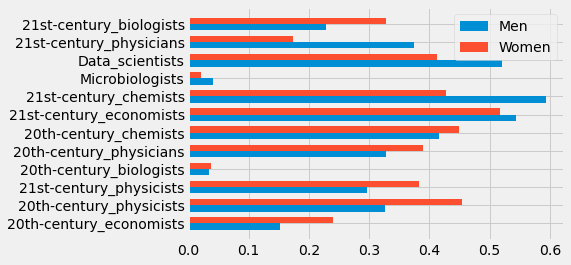

In [45]:
fig, ax = plt.subplots()

N = len(x) 
ind = np.arange(N) 
width = 0.35       
ax.barh(ind, y_men, width, label='Men')
ax.barh(ind + width, y_women, width,
    label='Women')

plt.yticks(ind + width / 2, x)
plt.legend(loc='best')

In [46]:
df_nobel = pd.read_csv('data/nobel.csv')

In [47]:
df_nobel

,Unnamed: 0,prizes,laureates,women,youngest,oldest
0,physics,114,216,4,25,96
1,chemistry,112,186,7,35,97
2,medicine,111,222,12,32,87
3,economics,52,86,2,46,90


In [68]:
#HYPOTHESIS TEST COMPARING 20TH CENTURY TO 21ST CENTURY BY FIELD

compare_century = dfcsv[(dfcsv['category']!='Data_scientists') & (dfcsv['category']!='Microbiologists')]

In [69]:
compare_century_grouped = compare_century.groupby('category')

In [70]:
compare_century_grouped_sum = compare_century_grouped.sum()

In [73]:
compare_century_grouped_sum

,count_female_words,count_male_words,count_nonbinary_words,doctorate,len_page,female,male,nonbinary,gender_unclear,here,perc_fem
category,,,,,,,,,,,
20th-century_biologists,15666,55253,2999,631,6046921,702,3040,5,0,3742,0.187600
20th-century_chemists,5230,16441,1173,335,1963960,185,771,4,0,956,0.193515
20th-century_economists,4239,32956,1934,515,3842056,196,1483,1,0,1679,0.116736
20th-century_physicians,21084,73764,4194,152,7818675,833,3527,4,0,4360,0.191055
20th-century_physicists,5290,29521,1825,485,3314660,200,1243,0,0,1443,0.138600
21st-century_biologists,5900,8705,818,459,1929295,403,668,1,0,1071,0.376284
21st-century_chemists,3391,6561,373,377,1289566,203,500,0,0,703,0.288762
21st-century_economists,2651,10552,851,503,1778140,178,719,1,0,897,0.198439
21st-century_physicians,4684,7378,695,22,1208984,239,410,1,0,649,0.368259


In [72]:
compare_century_grouped_sum['perc_fem'] = compare_century_grouped_sum['female']/compare_century_grouped_sum['here']

In [54]:
from scipy import stats

In [99]:
#probability of seeing the sample assuming that the proportion is .5
n = compare_century_grouped_sum.loc['20th-century_biologists', 'here']
p = .5
binomial = stats.binom(n, .5 )
val = compare_century_grouped_sum.loc['20th-century_biologists', 'female']
prob = binomial.cdf(val)

print(f"{prob:.100f}")

0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [86]:
p_value

0.0

In [87]:
compare_century_grouped_sum.loc['20th-century_chemists', 'female']

185

In [88]:
compare_century_grouped_sum.loc['20th-century_chemists', 'here']

956